In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


1.0890873786407764
1.666282651072125
1.5372100192678229
[   40.81320341 -1048.50182013]
[   40.37216666 -1006.20531293]


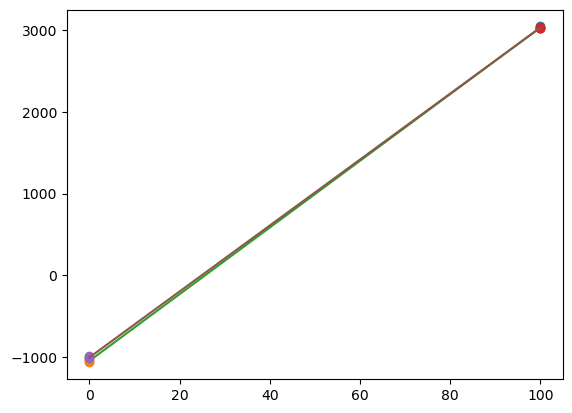

In [3]:
# Data paths
vch = [
    "./Data/Volt/Boiling Water/Trial 1 Commercial.csv",
    "./Data/Volt/Boiling Water/Trial 2 Commercial.csv",
    "./Data/Volt/Boiling Water/Trial 3 Commercial.csv",
]
vcc = [
    "./Data/Volt/Ice Water/Trial 1 Commercial.csv",
    "./Data/Volt/Ice Water/Trial 2 Commercial.csv",
    "./Data/Volt/Ice Water/Trial 3 Commercial.csv",
]
vbh = [
    "./Data/Volt/Boiling Water/Trial 1 Built.csv",
    "./Data/Volt/Boiling Water/Trial 2 Built.csv",
    "./Data/Volt/Boiling Water/Trial 3 Built.csv",
]
vbc = [
    "./Data/Volt/Ice Water/Trial 1 Built.csv",
    "./Data/Volt/Ice Water/Trial 2 Built.csv",
    "./Data/Volt/Ice Water/Trial 3 Built.csv",
]

temp_cold = [
    "./Data/Temp/Ice Water/Trial 1.csv", 
    "./Data/Temp/Ice Water/Trial 2.csv", 
    "./Data/Temp/Ice Water/Trial 3.csv"
]

tc1 = np.loadtxt(temp_cold[0], delimiter=",", skiprows=7, usecols=[3])
tc2 = np.loadtxt(temp_cold[1], delimiter=",", skiprows=7, usecols=[3])
tc3 = np.loadtxt(temp_cold[2], delimiter=",", skiprows=7, usecols=[3])

print(tc1.mean())
print(tc2.mean())
print(tc3.mean())

# Hand built thermocouple Seebeck coefficient calculations
vbh1 = np.loadtxt(vbh[0], delimiter=",", skiprows=7, usecols=[2])
vbh2 = np.loadtxt(vbh[1], delimiter=",", skiprows=7, usecols=[2])
vbh3 = np.loadtxt(vbh[2], delimiter=",", skiprows=7, usecols=[2])

vbc1 = np.loadtxt(vbc[0], delimiter=",", skiprows=7, usecols=[2])
vbc2 = np.loadtxt(vbc[1], delimiter=",", skiprows=7, usecols=[2])
vbc3 = np.loadtxt(vbc[2], delimiter=",", skiprows=7, usecols=[2])

seebeck_coeff_built = np.polyfit([0,0,0,100,100,100], [vbc1.mean(), vbc2.mean(), vbc3.mean(),vbh1.mean(), vbh2.mean(), vbh3.mean()], deg=1)
print(seebeck_coeff_built)

# Commercial thermocouple Seebeck coefficient calculations
vch1 = np.loadtxt(vch[0], delimiter=",", skiprows=7, usecols=[2])
vch2 = np.loadtxt(vch[1], delimiter=",", skiprows=7, usecols=[2])
vch3 = np.loadtxt(vch[2], delimiter=",", skiprows=7, usecols=[2])

vcc1 = np.loadtxt(vcc[0], delimiter=",", skiprows=7, usecols=[2])
vcc2 = np.loadtxt(vcc[1], delimiter=",", skiprows=7, usecols=[2])
vcc3 = np.loadtxt(vcc[2], delimiter=",", skiprows=7, usecols=[2])

seebeck_coeff_comm = np.polyfit([0,0,0,100,100,100], [vcc1.mean(), vcc2.mean(), vcc3.mean(),vch1.mean(), vch2.mean(), vch3.mean()], deg=1)
print(seebeck_coeff_comm)

# Create curves for plotting fit line
temp = np.linspace(0, 100, 1000)
seebeck_curve_comm = (temp * seebeck_coeff_comm[0]) + seebeck_coeff_comm[1]
seebeck_curve_built = (temp * seebeck_coeff_built[0]) + seebeck_coeff_built[1]

# Plotting
plt.plot([100, 100, 100], [vbh1.mean(), vbh2.mean(), vbh3.mean()], 'o')
plt.plot([0, 0, 0], [vbc1.mean(), vbc2.mean(), vbc3.mean()],'o')
plt.plot(temp, seebeck_curve_built)

plt.plot([100, 100, 100], [vch1.mean(), vch2.mean(), vch3.mean()], 'o')
plt.plot([0, 0, 0], [vcc1.mean(), vcc2.mean(), vcc3.mean()],'o')
plt.plot(temp, seebeck_curve_comm)
plt.show()


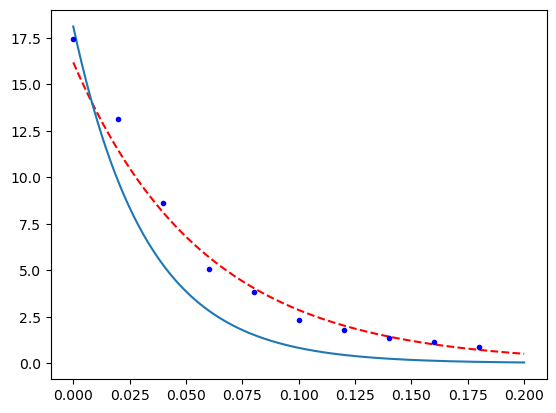

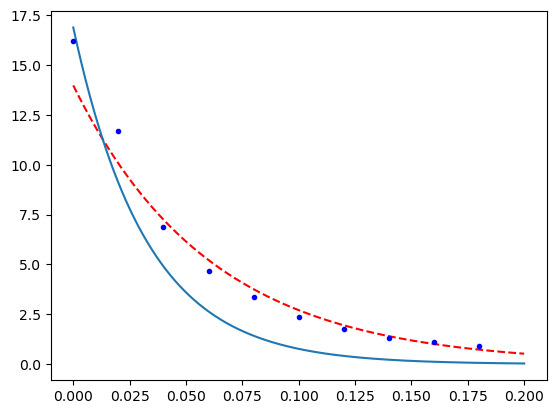

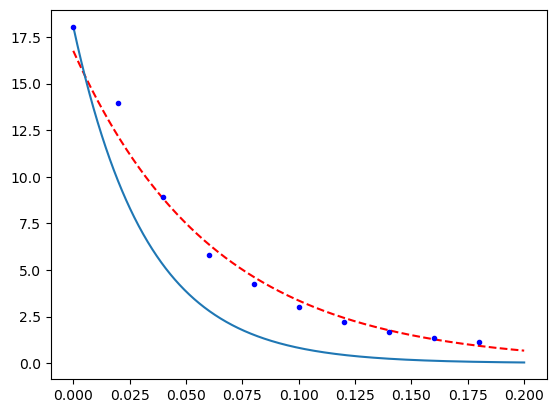

'\nplt.plot(t_exp2, T_exp2, ".r")\nplt.plot(time, drop2_fit, "--g")\nplt.plot(t_exp2, T(t_exp2, T0_2, tau_theory), "--b")\nplt.show()\n'

In [44]:
# Data paths
t1r1 = ["./Data/EXP1.2 - TASK1/rate_1_trial_1.csv", "./Data/EXP1.2 - TASK1/rate_1_trial_2.csv", "./Data/EXP1.2 - TASK1/rate_1_trial_3.csv"]
t1r2 = ["./Data/EXP1.2 - TASK1/rate_2_trial_1.csv", "./Data/EXP1.2 - TASK1/rate_2_trial_2.csv", "./Data/EXP1.2 - TASK1/rate_2_trial_3.csv"]
t1r3 = ["./Data/EXP1.2 - TASK1/rate_3_trial_1.csv", "./Data/EXP1.2 - TASK1/rate_3_trial_2.csv", "./Data/EXP1.2 - TASK1/rate_3_trial_3.csv"]

# Load data
drop1 = np.loadtxt(t1r2[0], delimiter=",", skiprows=7, usecols=[1,2])
drop2 = np.loadtxt(t1r2[1], delimiter=",", skiprows=7, usecols=[1,2])
drop3 = np.loadtxt(t1r2[2], delimiter=",", skiprows=7, usecols=[1,2])

# Theoretical calculations
bead_D = 1.3933 * (1/1000)

# Values for K Cited From TABLE 1 of:
# Sundqvist, B. (1992). 
# Thermal diffusivity and thermal conductivity of Chromel, Alumel, and Constantan in the range 100–450 K. 
# Journal of Applied Physics, 72(2), 539–545.
# doi:10.1063/1.351885 
K_chromel = 4.91 * 10**-6
K_alumel = 7.25 * 10**-6
K_avg = (K_chromel + K_alumel) / 2
tau_theory = (bead_D**2) / (K_avg * np.pi**2)

# Getting initial temp
T0_1 = drop1[:100, 1].mean()
T0_2 = drop2[:100, 1].mean()
T0_3 = drop3[:100, 1].mean()

def T(t, T0, tau):
    return T0 * np.exp(-t / tau)

def fit_exp(t, y):
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

# Start and end of each temp drop trial
start_idx1 = np.diff(drop1[:, 1]).argmin() - 1
end_idx1 = start_idx1 + 10

start_idx2 = np.diff(drop2[:, 1]).argmin() - 1
end_idx2 = start_idx2 + 10

start_idx3 = np.diff(drop3[:, 1]).argmin() - 1
end_idx3 = start_idx3 + 10

t_exp1 = drop1[start_idx1:end_idx1, 0] - drop1[start_idx1, 0]
T_exp1 = drop1[start_idx1:end_idx1, 1]

t_exp2 = drop2[start_idx2:end_idx2, 0] - drop2[start_idx2, 0]
T_exp2 = drop2[start_idx2:end_idx2, 1]

t_exp3 = drop3[start_idx3:end_idx3, 0] - drop3[start_idx3, 0]
T_exp3 = drop3[start_idx3:end_idx3, 1]

# Exponential data fit for each trial
time = np.linspace(0, 0.2, 1000)
A1, K1 = fit_exp(t_exp1, T_exp1)
A2, K2 = fit_exp(t_exp2, T_exp2)
A3, K3 = fit_exp(t_exp3, T_exp3)
drop1_fit = A1 * np.exp(K1 * time)
drop2_fit = A2 * np.exp(K2 * time)
drop3_fit = A3 * np.exp(K3 * time)

# Plot data, fitted curve and theoretical curve
plt.plot(time, drop1_fit, "r--")
plt.plot(time, T(time, T0_1, tau_theory))
plt.plot(t_exp1, T_exp1, "b.")
plt.show()

plt.plot(time, drop2_fit, "r--")
plt.plot(time, T(time, T0_2, tau_theory))
plt.plot(t_exp2, T_exp2, "b.")
plt.show()

plt.plot(time, drop3_fit, "r--")
plt.plot(time, T(time, T0_3, tau_theory))
plt.plot(t_exp3, T_exp3, "b.")
plt.show()

In [50]:
# Load data
bp1 = np.loadtxt("./Data/EXP1.2 - TASK2/hotT_trial1.csv", delimiter=",", skiprows=7, usecols=[2])
bp2 = np.loadtxt("./Data/EXP1.2 - TASK2/hotT_trial2.csv", delimiter=",", skiprows=7, usecols=[2])
bp3 = np.loadtxt("./Data/EXP1.2 - TASK2/hotT_trial3.csv", delimiter=",", skiprows=7, usecols=[2])

bp = np.array([bp1.mean(), bp2.mean(), bp3.mean()])
bp_mean = bp.mean()

# Value for Kb cited from:
# Hoyt, C. S., & Fink, C. K. (1937).
# The Constants of Ebullioscopy.
# The Journal of Physical Chemistry, 41(3), 453–456.
# doi:10.1021/j150381a010 
Kb = 0.51
i = 2
delta_T = bp_mean - 100
print(delta_T)
m = delta_T / (i * Kb)



6.381734844444551
6.256602788671128
